### Emoji Prediciton

In [1]:
import emoji
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv('train_emoji.csv')

In [40]:
test=pd.read_csv('test_emoji.csv')

In [41]:
test.head()

,I want to eat,4
0,he did not answer\t,3
1,he got a raise\t,2
2,she got me a present\t,0
3,ha ha ha it was so funny\t,2
4,he is a good friend\t,0


In [50]:
testt=test.values
x_test=testt[:,0]
y_test=testt[:,1]

In [51]:
y_test

array([3, 2, 0, 2, 0, 0, 0, 4, 2, 1, 3, 3, 2, 1, 3, 3, 2, 3, 4, 0, 2, 4,
       3, 3, 3, 3, 0, 2, 0, 0, 1, 3, 2, 0, 1, 2, 4, 4, 2, 2, 2, 0, 1, 2,
       0, 2, 2, 2, 3, 3, 0, 3, 2, 2, 3], dtype=object)

In [4]:
train.head()

,never talk to me again,3,Unnamed: 2,Unnamed: 3
0,I am proud of your achievements,2,NaN,NaN
1,It is the worst day in my life,3,NaN,NaN
2,Miss you so much,0,NaN,[0]
3,food is life,4,NaN,NaN
4,I love you mum,0,NaN,NaN


In [7]:
emoji_dict={'0': ":heart:",'1': ":baseball:",'2': ":smile:",'3': ":disappointed:",'4': ":fork_and_knife:"}

In [86]:
# for visualising
for e in emoji_dict:
    s=emoji.emojize(emoji_dict[e],use_aliases=True)
    print(s)

❤
⚾
😄
😞
🍴


In [9]:
X=train.values
Y=X[:,1]
X=X[:,0]

In [10]:
print(X.shape,Y.shape)

(131,) (131,)


In [11]:
# Reading and processing glove vector file and preparing a pretrained embedding layer
from keras.layers import *
def readGloveFile(gloveFile):
    with open(gloveFile, 'r',encoding='utf-8') as f:
        wordToGlove = {}  
        wordToIndex = {}  
        indexToWord = {}  
        for line in f:
            record = line.strip().split()
            token = record[0] 
            wordToGlove[token] = np.array(record[1:], dtype=np.float64)

        tokens = sorted(wordToGlove.keys())
        for idx, tok in enumerate(tokens):
            kerasIdx = idx + 1 
            wordToIndex[tok] = kerasIdx 
            indexToWord[kerasIdx] = tok 

    return wordToIndex, indexToWord, wordToGlove

# Creating Pretrained Embedding Layer
def createPretrainedEmbeddingLayer(wordToGlove, wordToIndex, isTrainable):
    vocabLen = len(wordToIndex) + 1  
    embDim = next(iter(wordToGlove.values())).shape[0] 

    embeddingMatrix = np.zeros((vocabLen, embDim)) 
    for word, index in wordToIndex.items():
        embeddingMatrix[index, :] = wordToGlove[word]

    embeddingLayer = Embedding(vocabLen, embDim, weights=[embeddingMatrix], trainable=isTrainable)
    return embeddingLayer




Using TensorFlow backend.


In [12]:
wordToIndex, indexToWord, wordmvnToGlove = readGloveFile("glove.6B.50d.txt")
pretrainedEmbeddingLayer = createPretrainedEmbeddingLayer(wordToGlove, wordToIndex, False)

W0818 15:41:18.825506  8888 deprecation_wrapper.py:119] From c:\users\sachin\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [14]:
# padding of training data to maintain the uniformmity in our model

from keras.preprocessing import sequence
padded_list=[]
for i in X:
    i =i.split()
    temp_list=[]
    for j in i:
        if wordToIndex.get(j):
            temp_list.append(wordToIndex[j])
        else:
            temp_list.append(0)
    
    padded_seq=sequence.pad_sequences([temp_list],15,padding='post')
    
    #print(padded_seq)
    padded_list.append(padded_seq)
    
padded_list=np.array(padded_list)

In [54]:
#padding for test data
from keras.preprocessing import sequence
padded_test_list=[]
for i in x_test:
    i =i.split()
    temp_list=[]
    for j in i:
        if wordToIndex.get(j):
            temp_list.append(wordToIndex[j])
        else:
            temp_list.append(0)
    
    padded_seq=sequence.pad_sequences([temp_list],15,padding='post')
    
    #print(padded_seq)
    padded_test_list.append(padded_seq)
    
padded_test_list=np.array(padded_test_list)

In [19]:
#reshaping
padded_list=padded_list.reshape(X.shape[0],15)
print(padded_list.shape)

(131, 15)


In [57]:
padded_test_list=padded_test_list.reshape(x_test.shape[0],15)
print(padded_test_list.shape)

(55, 15)


In [20]:
# converting ytrain and ytest into categorical data
from keras.utils import np_utils
y_c=np_utils.to_categorical(Y)

In [52]:
y_ct=np_utils.to_categorical(y_test)

In [22]:
y_c.shape

(131, 5)

In [21]:
from keras.models import Sequential

In [23]:
model=Sequential()
model.add(pretrainedEmbeddingLayer)
model.add(LSTM(128,activation='tanh',dropout=0.3))

model.add(Dense(5,activation='softmax'))
model.summary()

W0818 15:47:01.562141  8888 deprecation_wrapper.py:119] From c:\users\sachin\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 15:47:01.852454  8888 deprecation_wrapper.py:119] From c:\users\sachin\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0818 15:47:01.971492  8888 deprecation_wrapper.py:119] From c:\users\sachin\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0818 15:47:01.973487  8888 deprecation_wrapper.py:119] From c:\users\sachin\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is depre

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 50)          20000050  
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               91648     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 20,092,343
Trainable params: 92,293
Non-trainable params: 20,000,050
_________________________________________________________________


In [59]:
from keras.callbacks import ModelCheckpoint
checkpoint =ModelCheckpoint('best_model.h5', monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [60]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [61]:
hist=model.fit(padded_list,y_c,epochs=150,batch_size=64,callbacks=[checkpoint],validation_data=(padded_test_list,y_ct))


Train on 131 samples, validate on 55 samples
Epoch 1/150
131/131 [==============================] - 1s 10ms/step - loss: 0.1235 - acc: 0.9695 - val_loss: 1.4855 - val_acc: 0.6545
Epoch 2/150
131/131 [==============================] - 0s 639us/step - loss: 0.0848 - acc: 0.9618 - val_loss: 1.5791 - val_acc: 0.6545
Epoch 3/150
131/131 [==============================] - 0s 678us/step - loss: 0.2220 - acc: 0.9160 - val_loss: 1.6915 - val_acc: 0.5818
Epoch 4/150
131/131 [==============================] - 0s 678us/step - loss: 0.0855 - acc: 0.9771 - val_loss: 1.8985 - val_acc: 0.5818
Epoch 5/150
131/131 [==============================] - 0s 898us/step - loss: 0.1278 - acc: 0.9466 - val_loss: 1.7857 - val_acc: 0.6000
Epoch 6/150
131/131 [==============================] - 0s 868us/step - loss: 0.0915 - acc: 0.9695 - val_loss: 1.6725 - val_acc: 0.6000
Epoch 7/150
131/131 [==============================] - 0s 571us/step - loss: 0.0846 - acc: 0.9771 - val_loss: 1.6867 - val_acc: 0.6182
Epoch 8/150

131/131 [==============================] - 0s 1ms/step - loss: 0.0882 - acc: 0.9771 - val_loss: 1.7545 - val_acc: 0.6364
Epoch 62/150
131/131 [==============================] - 0s 2ms/step - loss: 0.0493 - acc: 0.9924 - val_loss: 1.7566 - val_acc: 0.6545
Epoch 63/150
131/131 [==============================] - 0s 959us/step - loss: 0.0618 - acc: 0.9695 - val_loss: 1.7363 - val_acc: 0.6364
Epoch 64/150
131/131 [==============================] - 0s 906us/step - loss: 0.0400 - acc: 0.9847 - val_loss: 1.7404 - val_acc: 0.6182
Epoch 65/150
131/131 [==============================] - 0s 876us/step - loss: 0.0736 - acc: 0.9695 - val_loss: 1.7529 - val_acc: 0.6545
Epoch 66/150
131/131 [==============================] - 0s 975us/step - loss: 0.0390 - acc: 0.9847 - val_loss: 1.7531 - val_acc: 0.6545
Epoch 67/150
131/131 [==============================] - 0s 898us/step - loss: 0.0747 - acc: 0.9771 - val_loss: 1.6064 - val_acc: 0.6545
Epoch 68/150
131/131 [==============================] - 0s 731us/

131/131 [==============================] - 0s 640us/step - loss: 0.0503 - acc: 0.9847 - val_loss: 1.5376 - val_acc: 0.6545
Epoch 122/150
131/131 [==============================] - 0s 647us/step - loss: 0.0610 - acc: 0.9771 - val_loss: 1.5527 - val_acc: 0.6545
Epoch 123/150
131/131 [==============================] - 0s 632us/step - loss: 0.0202 - acc: 1.0000 - val_loss: 1.5601 - val_acc: 0.6545
Epoch 124/150
131/131 [==============================] - 0s 655us/step - loss: 0.0246 - acc: 1.0000 - val_loss: 1.5687 - val_acc: 0.6545
Epoch 125/150
131/131 [==============================] - 0s 609us/step - loss: 0.0356 - acc: 0.9924 - val_loss: 1.5717 - val_acc: 0.6545
Epoch 126/150
131/131 [==============================] - 0s 799us/step - loss: 0.0610 - acc: 0.9847 - val_loss: 1.5799 - val_acc: 0.6545
Epoch 127/150
131/131 [==============================] - 0s 716us/step - loss: 0.0194 - acc: 1.0000 - val_loss: 1.5900 - val_acc: 0.6545
Epoch 128/150
131/131 [==============================] 

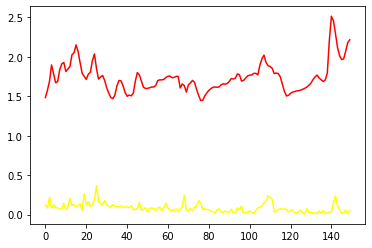

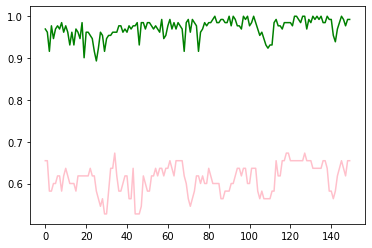

In [63]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],color='yellow')
plt.plot(hist.history['val_loss'],color='red')
plt.show()
plt.plot(hist.history['acc'],color='green')
plt.plot(hist.history['val_acc'],color='pink')
plt.show()

In [64]:
from keras.models import load_model
m=load_model('best_model.h5')

In [66]:
# from our model
model.evaluate(padded_test_list,y_ct)

55/55 [==============================] - 0s 181us/step


[2.216485782103105, 0.6545454556291753]

In [65]:
# from saved best model
m.evaluate(padded_test_list,y_ct)

55/55 [==============================] - 0s 6ms/step


[1.5160657015713779, 0.6727272694761103]

In [68]:
# Predicting 
pred=m.predict(padded_test_list)

In [74]:
predictions=[]
for i in range(len(pred)):
    a=np.argmax(pred[i])
    predictions.append(a)

In [91]:
#ACCURACY
acc=(np.sum(predictions==y_test)/y_test.shape[0])*100
acc

67.27272727272727

In [84]:
predictions[0]

3

In [90]:
# visualising the results
# first emoji shown is predicted by our model
#while the second one is from our given data

for i in range(x_test.shape[0]):
    
    print(x_test[i])
    p=predictions[i]
    t=y_test[i]
    s=emoji.emojize(emoji_dict[str(p)],use_aliases=True)
    a=emoji.emojize(emoji_dict[str(t)],use_aliases=True)
    print(s,a)
    

he did not answer	
😞 😞
he got a raise	
❤ 😄
she got me a present	
❤ ❤
ha ha ha it was so funny	
😄 😄
he is a good friend	
😄 ❤
I am upset	
😞 ❤
We had such a lovely dinner tonight	
😄 ❤
where is the food	
🍴 🍴
Stop making this joke ha ha ha	
😄 😄
where is the ball	
⚾ ⚾
work is hard	
😄 😞
This girl is messing with me	
😞 😞
are you serious ha ha	
❤ 😄
Let us go play baseball	
⚾ ⚾
This stupid grader is not working 	
😞 😞
work is horrible	
😞 😞
Congratulation for having a baby	
❤ 😄
stop messing around	
😞 😞
any suggestions for dinner	
🍴 🍴
I love taking breaks	
❤ ❤
you brighten my day	
❤ 😄
I boiled rice	
🍴 🍴
she is a bully	
❤ 😞
Why are you feeling bad	
😞 😞
I am upset	
😞 😞
I worked during my birthday	
😄 😞
My grandmother is the love of my life	
😄 ❤
enjoy your break	
⚾ 😄
valentine day is near	
😄 ❤
I miss you so much	
❤ ❤
throw the ball	
⚾ ⚾
My life is so boring	
😞 😞
she said yes	
😄 😄
will you be my valentine	
❤ ❤
he can pitch really well	
❤ ⚾
dance with me	
😄 😄
I am starving	
🍴 🍴
See you at the restaurant	

In [92]:
#i hope,its all clear
# thank you :)